In [15]:
import pandas as pd
import re

# Load the dataset
file_path = 'steam_apps_info.csv'  # Ensure the file is in the same directory as this script
data = pd.read_csv(file_path)  # Correct method for reading a CSV file

# Step 1: Drop unnecessary columns
data = data.drop(columns=['Unnamed: 15'], errors='ignore')

# Step 2: Convert price from string to numeric by extracting numeric values
def extract_price(value):
    try:
        numeric_value = re.search(r'[\d\.]+', str(value))
        return float(numeric_value.group()) if numeric_value else None
    except:
        return None

data['price'] = data['price'].apply(extract_price)

# Step 3: Parse list-like strings into actual Python lists
def safe_parse_list(value):
    try:
        return eval(value)
    except:
        return []

list_columns = ['genres', 'categores', 'platforms']
for column in list_columns:
    data[column] = data[column].apply(safe_parse_list)

# Step 4: Remove rows with NaN values
data = data.dropna()

# Save the cleaned dataset
cleaned_file_path = 'steam_apps_info_cleaned.csv'  # The cleaned dataset will be saved here
data.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed and saved to:", cleaned_file_path)

Data cleaning completed and saved to: steam_apps_info_cleaned.csv


In [16]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install spacy 

Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0-py3-none-any.whl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.1 MB/s eta 0:00:0000:0100:01


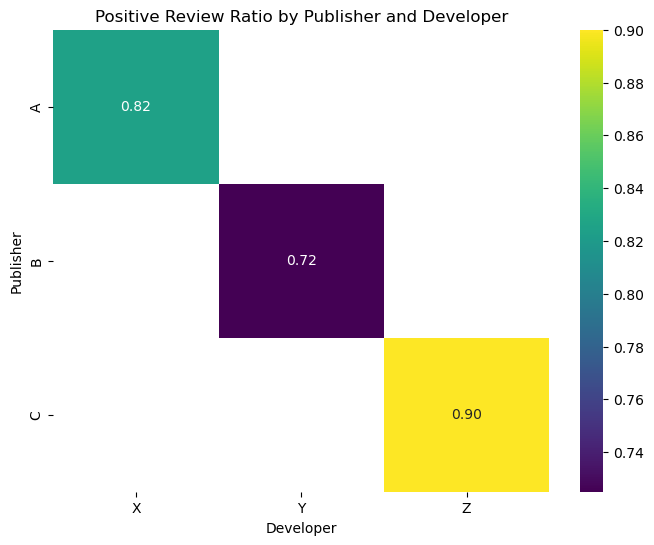

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'Publisher': ['A', 'B', 'C', 'A', 'B'],
    'Developer': ['X', 'Y', 'Z', 'X', 'Y'],
    'Positive Review Ratio': [0.8, 0.7, 0.9, 0.85, 0.75]
})

# Create a pivot table
pivot_table = data.pivot_table(
    values='Positive Review Ratio',
    index='Publisher',
    columns='Developer'
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.title('Positive Review Ratio by Publisher and Developer')
plt.xlabel('Developer')
plt.ylabel('Publisher')
plt.show()


In [21]:
!pip uninstall -y numpy h5py
!pip install numpy==1.25.0
!pip install h5py==3.8.0
!pip uninstall -y spacy thinc
!pip install spacy==3.6.0 thinc==8.1.12
!python -m spacy download en_core_web_sm


Found existing installation: numpy 1.25.0
Uninstalling numpy-1.25.0:
  Successfully uninstalled numpy-1.25.0
Found existing installation: h5py 3.8.0
Uninstalling h5py-3.8.0:
  Successfully uninstalled h5py-3.8.0
  Using cached numpy-1.25.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
  Using cached h5py-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
Found existing installation: spacy 3.6.0
Uninstalling spacy-3.6.0:
  Successfully uninstalled spacy-3.6.0
Found existing installation: thinc 8.1.12
Uninstalling thinc-8.1.12:
  Successfully uninstalled thinc-8.1.12
  Using cached spacy-3.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Using cached thinc-8

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

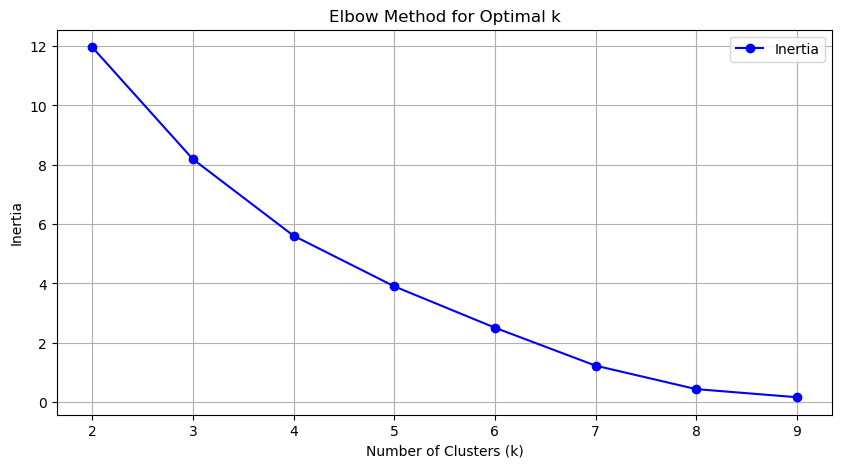

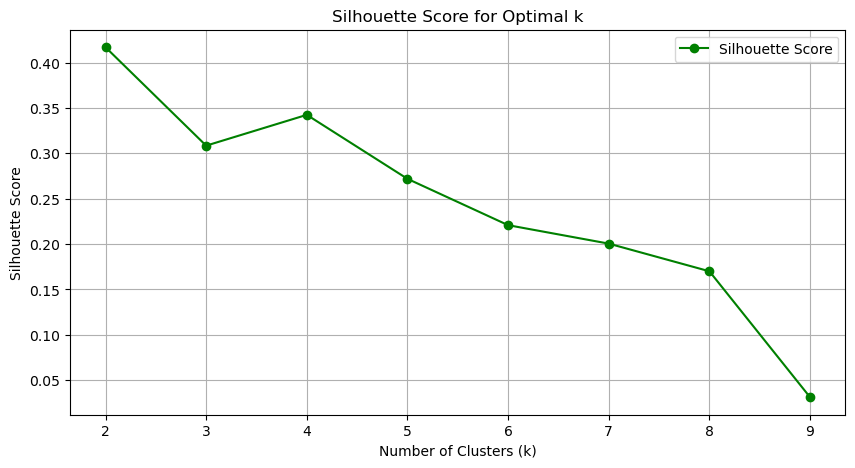

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


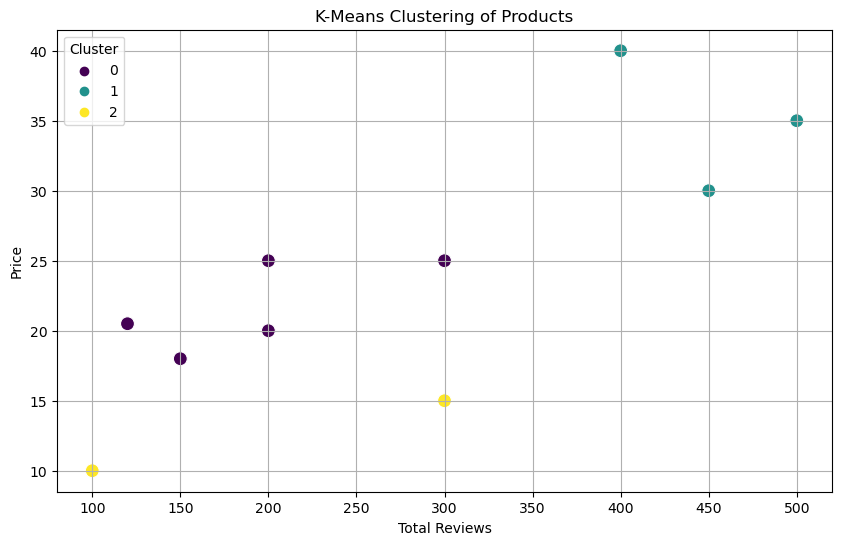

  Publisher  Total_Reviews  Price  Cluster
0         A            120   20.5        0
1         B            300   15.0        2
2         C            450   30.0        1
3         A            200   25.0        0
4         B            100   10.0        2
5         C            150   18.0        0
6         A            500   35.0        1
7         B            400   40.0        1
8         C            300   25.0        0
9         A            200   20.0        0


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual dataset)
data = pd.DataFrame({
    'Publisher': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Total_Reviews': [120, 300, 450, 200, 100, 150, 500, 400, 300, 200],
    'Price': [20.5, 15.0, 30.0, 25.0, 10.0, 18.0, 35.0, 40.0, 25.0, 20.0]
})

# Data preprocessing
# One-hot encode the Publisher column and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Total_Reviews', 'Price']),
        ('cat', OneHotEncoder(), ['Publisher'])
    ],
    remainder='drop'
)

X = preprocessor.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

# Apply K-Means with the optimal number of clusters
optimal_k = 3  # Based on elbow or silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Total_Reviews'],
    y=data['Price'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('K-Means Clustering of Products')
plt.xlabel('Total Reviews')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Display the resulting data with cluster labels
print(data)


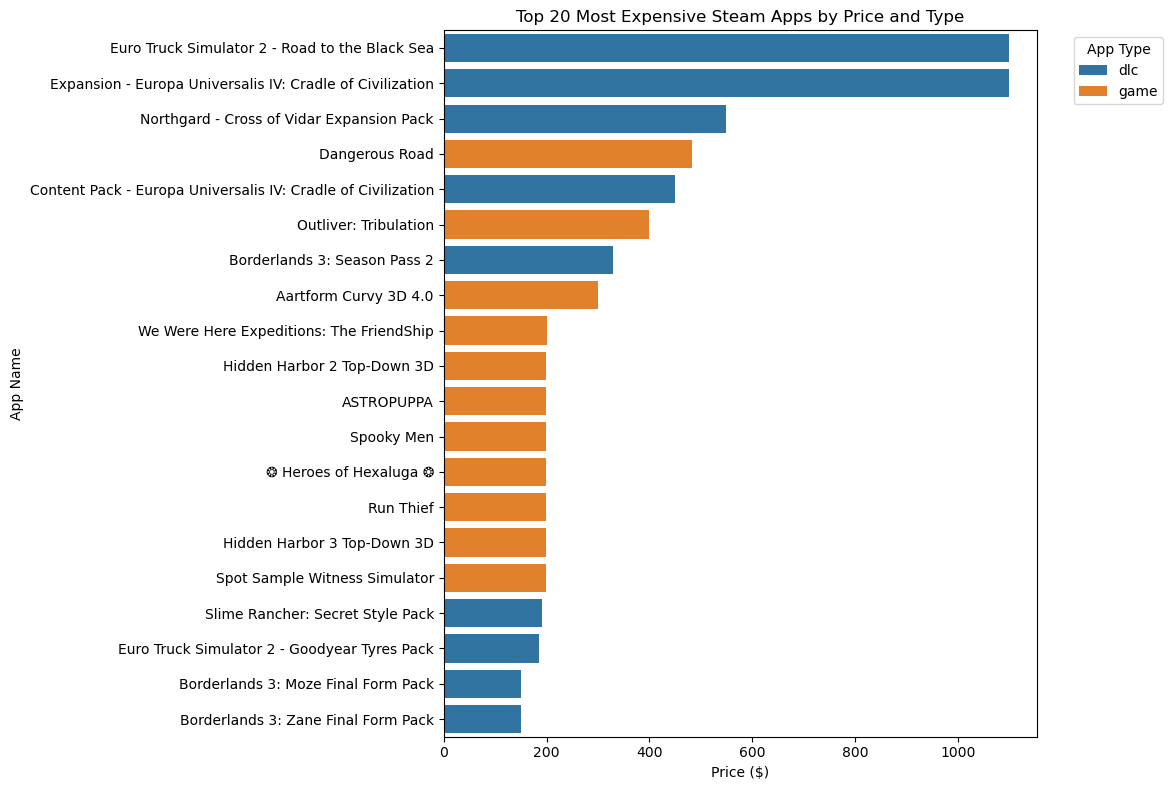

In [34]:
# Ensure 'app_type' exists in the DataFrame
if 'app_type' in data.columns:  # Replace 'df' with 'data' or the correct DataFrame name
    top_apps = data.sort_values(by='price', ascending=False).head(20)

    # Plot with the original 'app_type' column
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_apps, x='price', y='steam_app_name', hue='app_type', dodge=False)

    plt.title('Top 20 Most Expensive Steam Apps by Price and Type')
    plt.xlabel('Price ($)')
    plt.ylabel('App Name')
    plt.legend(title='App Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("'app_type' column is missing or was dropped.")


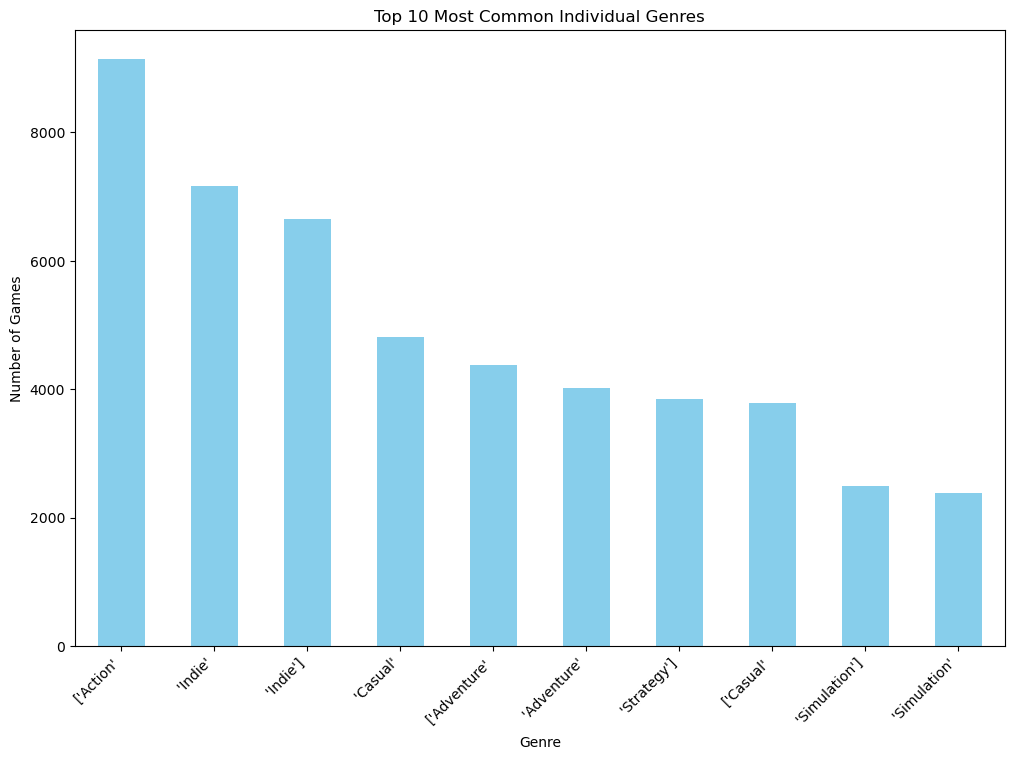

In [36]:
# Split genres into individual entries (assuming genres are comma-separated)
# Create a new dataframe where each row corresponds to a single genre
expanded_genres = data['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
expanded_genres.name = 'genre'

# Count occurrences of each individual genre
individual_genre_counts = expanded_genres.value_counts().head(10)

# Plot the top individual genres
plt.figure(figsize=(12, 8))
individual_genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Top 10 Most Common Individual Genres')
plt.xticks(rotation=45, ha='right')
plt.show()



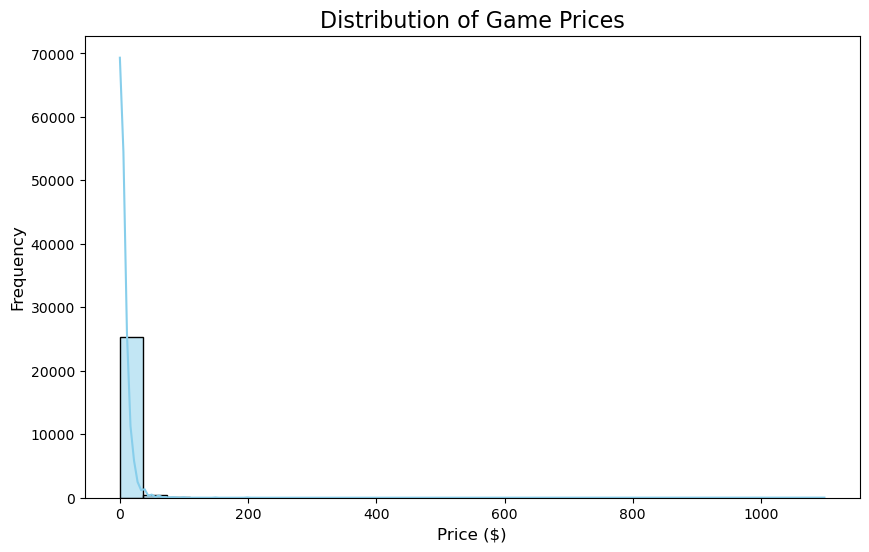

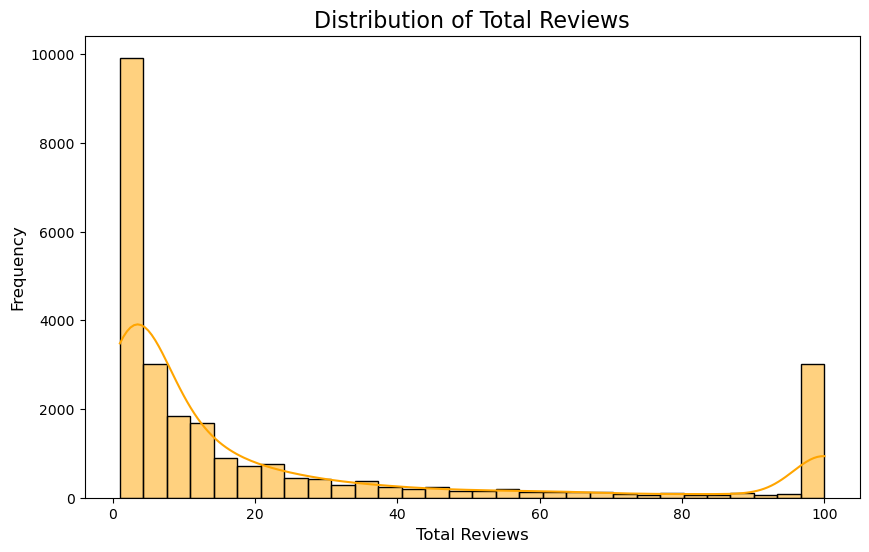

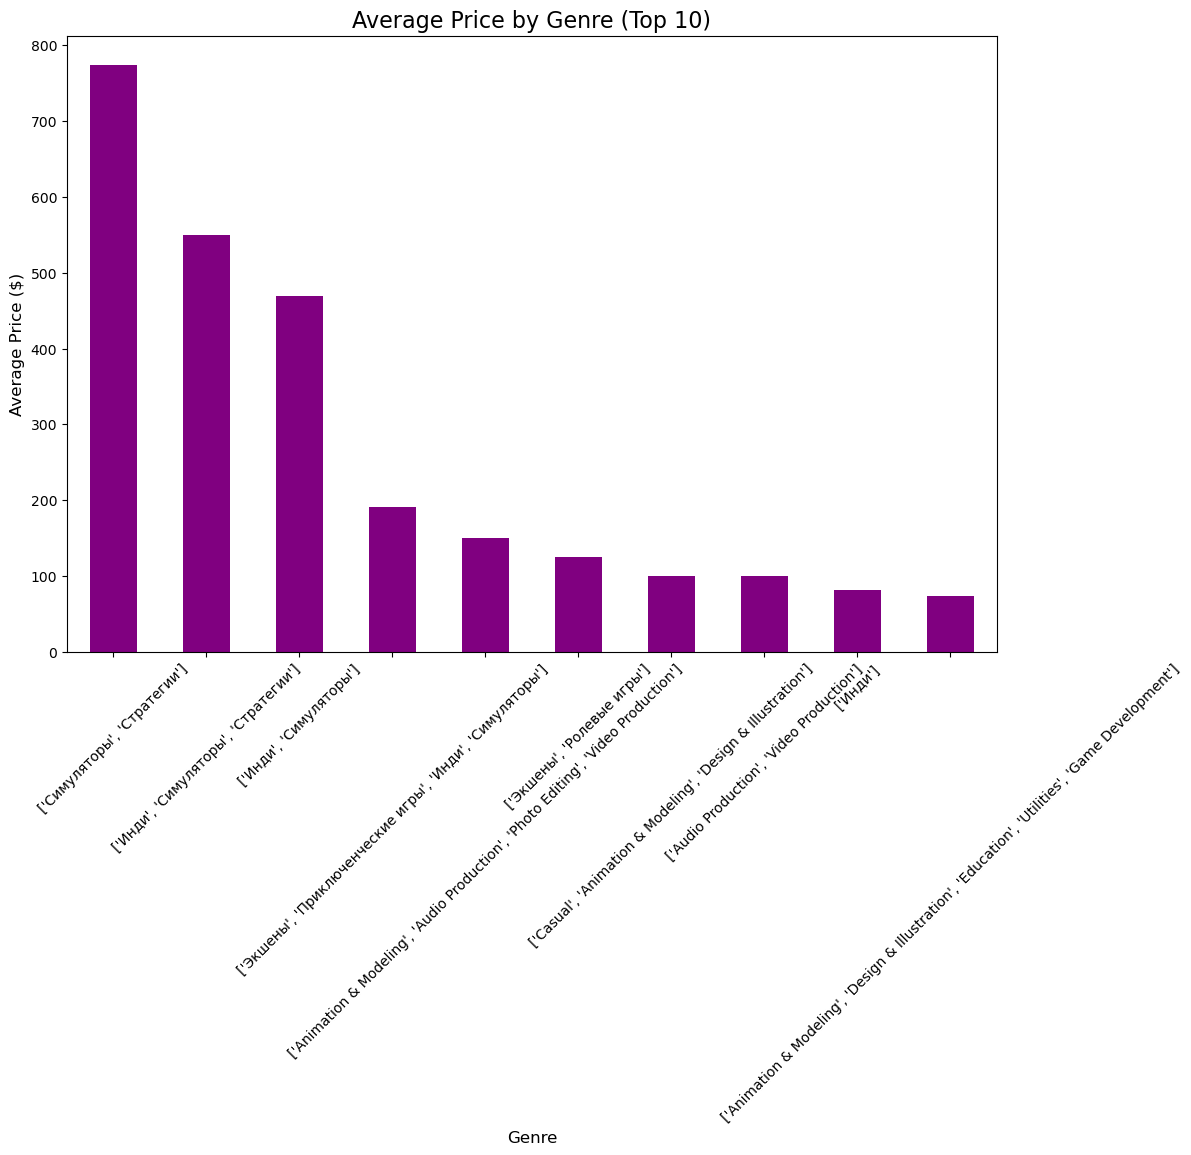

/tmp/ipykernel_136/1787659693.py:51: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_136/1787659693.py:51: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_136/1787659693.py:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'steam_apps_info_cleaned.csv'  
data = pd.read_csv(file_path)

# Preprocess the price column by removing any non-numeric characters
data['price'] = pd.to_numeric(data['price'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce').fillna(0.0)

# Drop missing values for relevant columns
data = data.dropna(subset=['total_reviews', 'price', 'genres'])

# Convert genres to string and process for visualization
data['genres'] = data['genres'].astype(str)

# Visualization 1: Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Game Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 2: Distribution of Total Reviews
plt.figure(figsize=(10, 6))
sns.histplot(data['total_reviews'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Reviews', fontsize=16)
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 3: Average Price by Genre
average_price_by_genre = data.groupby('genres')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
average_price_by_genre.plot(kind='bar', color='purple')
plt.title('Average Price by Genre (Top 10)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Reviews vs Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price'], y=data['total_reviews'], hue=data['genres'], alpha=0.7, palette='viridis')
plt.title('Price vs Total Reviews by Genre', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 5: Heatmap of Average Reviews and Prices by Genre
genre_summary = data.groupby('genres').agg({'price': 'mean', 'total_reviews': 'mean'}).sort_values('total_reviews', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_summary, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Average Reviews and Prices by Genre (Top 10)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
data = pd.read_csv('steam_apps_info.csv')

# Preprocess the price column
data['price'] = pd.to_numeric(data['price'].astype(str).str.replace('$', '', regex=True), errors='coerce').fillna(0.0)

# Define success based on positive review percentage
success_threshold = 0.7
data['success'] = (data['total_positive_reviews'] / data['total_reviews'] >= success_threshold).astype(int)

# Select features and target
features = data[['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'genres', 'platforms', 'price']].copy()
target = data['success']

# Fill missing values
features['genres'] = features['genres'].fillna('Unknown')
features['platforms'] = features['platforms'].fillna('Unknown')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres', 'platforms'])
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance analysis
importances = model.named_steps['classifier'].feature_importances_
numeric_features = ['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'price']
categorical_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['genres', 'platforms'])
feature_names = list(numeric_features) + list(categorical_features)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(importance_df)


Accuracy: 0.9848719937936384
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1498
           1       0.98      1.00      0.99      3658

    accuracy                           0.98      5156
   macro avg       0.99      0.98      0.98      5156
weighted avg       0.98      0.98      0.98      5156


Feature Importance:
                                                Feature  Importance
2                                total_negative_reviews    0.331149
1                                total_positive_reviews    0.322511
0                                         total_reviews    0.187992
3                                                 price    0.032293
1179                              platforms_['windows']    0.004782
...                                                 ...         ...
833   genres_['Casual', 'Indie', 'Racing', 'Strategy...    0.000000
1063  genres_['Photo Editing', 'Utilities', 'Video P...    0.000000
263   genre

Training Accuracy: 1.0
Testing Accuracy: 0.9848719937936384
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1498
           1       0.98      1.00      0.99      3658

    accuracy                           0.98      5156
   macro avg       0.99      0.98      0.98      5156
weighted avg       0.98      0.98      0.98      5156


Feature Importance:
                                                Feature  Importance
2                                total_negative_reviews    0.331149
1                                total_positive_reviews    0.322511
0                                         total_reviews    0.187992
3                                                 price    0.032293
1179                              platforms_['windows']    0.004782
...                                                 ...         ...
833   genres_['Casual', 'Indie', 'Racing', 'Strategy...    0.000000
1063  genres_['Photo Editing', 'Utilities', 'Vid

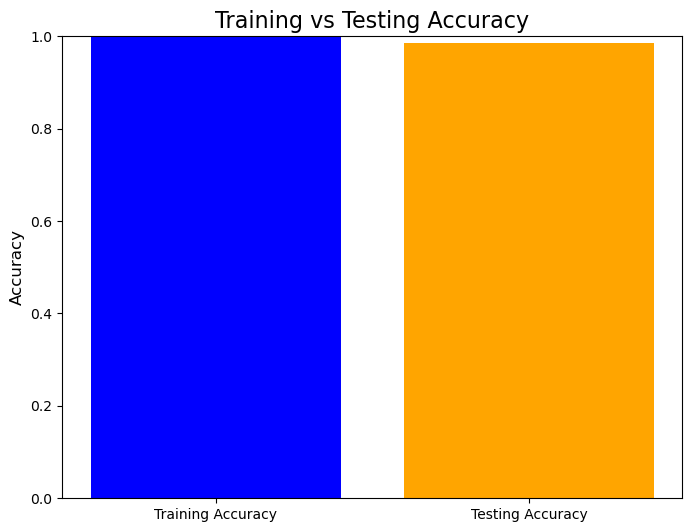

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('steam_apps_info.csv')

# Preprocess the price column
data['price'] = pd.to_numeric(data['price'].astype(str).str.replace('$', '', regex=True), errors='coerce').fillna(0.0)

# Define success based on positive review percentage
success_threshold = 0.7
data['success'] = (data['total_positive_reviews'] / data['total_reviews'] >= success_threshold).astype(int)

# Select features and target
features = data[['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'genres', 'platforms', 'price']].copy()
target = data['success']

# Fill missing values
features['genres'] = features['genres'].fillna('Unknown')
features['platforms'] = features['platforms'].fillna('Unknown')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres', 'platforms'])
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions and Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))

# Feature importance analysis
importances = model.named_steps['classifier'].feature_importances_
numeric_features = ['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'price']
categorical_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['genres', 'platforms'])
feature_names = list(numeric_features) + list(categorical_features)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(importance_df)

# Visualization: Training vs Testing Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title("Training vs Testing Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.show()


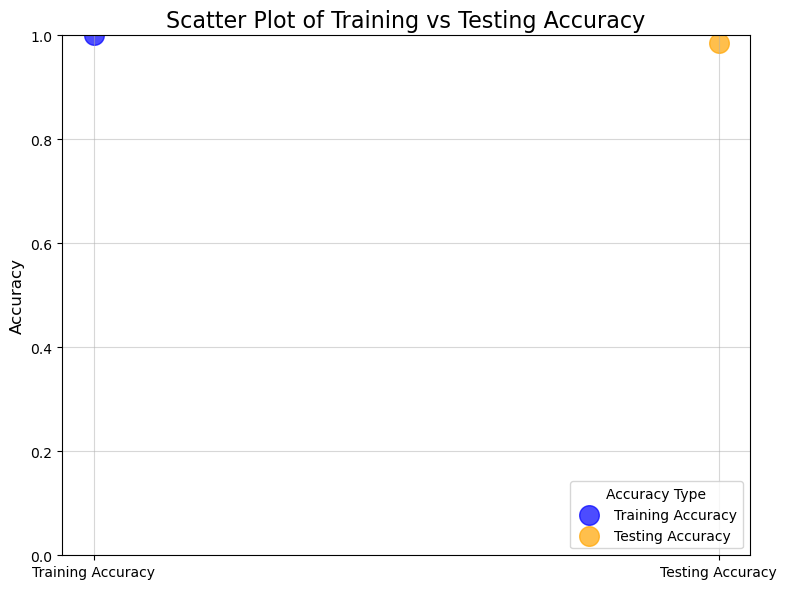

In [30]:
import matplotlib.pyplot as plt

# Create scatter plot for Training vs Testing Accuracy
plt.figure(figsize=(8, 6))

# Scatter points for training and testing accuracy
plt.scatter(['Training Accuracy'], [train_accuracy], color='blue', label='Training Accuracy', s=200, alpha=0.7)
plt.scatter(['Testing Accuracy'], [test_accuracy], color='orange', label='Testing Accuracy', s=200, alpha=0.7)

# Plot settings
plt.title("Scatter Plot of Training vs Testing Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Accuracy Type", loc='lower right')
plt.grid(alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


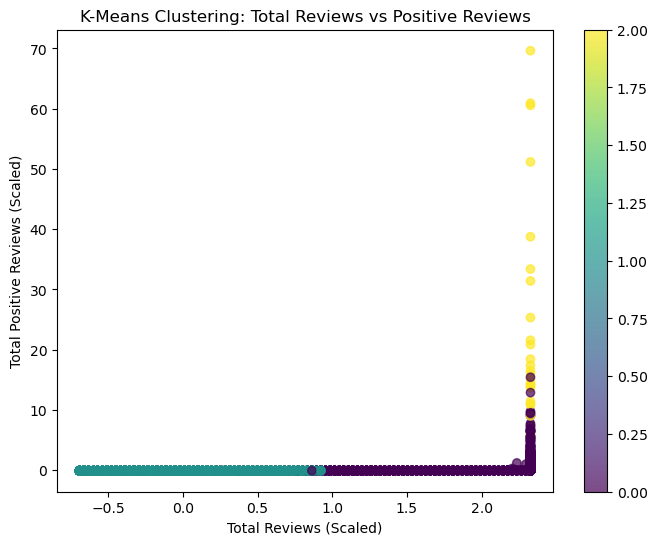

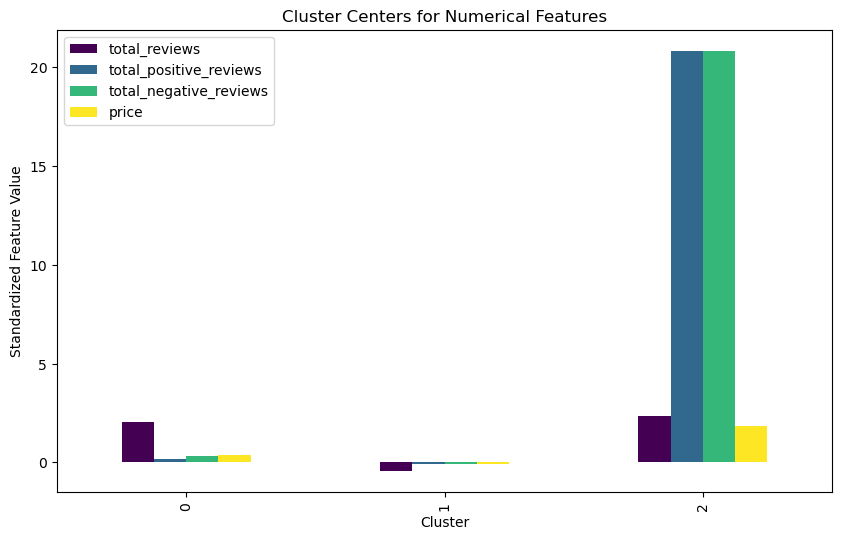

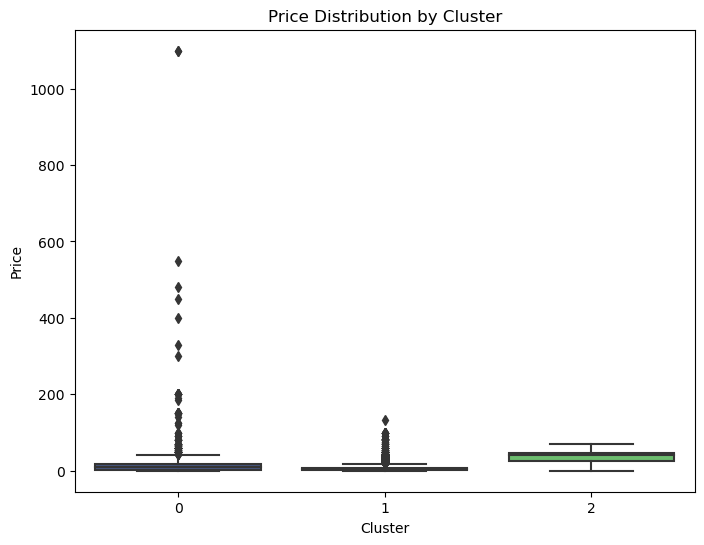

Clustered Data Preview:
                 steam_app_name  total_reviews  total_positive_reviews  \
0              DEAD END MISSION              1                       1   
1   SCP: Nemesi - Alpha Testing             49                      34   
2               The Weird Dream              5                       5   
3                     Line Link              1                       1   
4  Point Salad - The Board Game              4                       3   

   total_negative_reviews  price  cluster  
0                       0   3.99        1  
1                      15   0.00        1  
2                       0  13.99        1  
3                       0   0.99        1  
4                       1   8.99        1  

Cluster Summary Statistics:
         total_reviews  total_positive_reviews  total_negative_reviews  \
cluster                                                                  
0            90.060627              580.973856               98.289385   
1             9.

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('steam_apps_info_cleaned.csv')

# Preprocess the dataset
# Select numerical features for clustering
numerical_features = ['total_reviews', 'total_positive_reviews', 'total_negative_reviews', 'price']

# Handle missing values and clean the price column
data['price'] = pd.to_numeric(data['price'].astype(str).str.replace('$', '', regex=True), errors='coerce').fillna(0.0)
data = data.dropna(subset=numerical_features)  # Drop rows with missing numerical data

# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualization: Scatter plot for clusters (e.g., total_reviews vs total_positive_reviews)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    scaled_data[:, 0], 
    scaled_data[:, 1], 
    c=data['cluster'], 
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(scatter)
plt.xlabel('Total Reviews (Scaled)')
plt.ylabel('Total Positive Reviews (Scaled)')
plt.title('K-Means Clustering: Total Reviews vs Positive Reviews')
plt.show()

# Cluster Centers Visualization
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame of cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_features)

# Bar plot of cluster centers for each feature
cluster_centers_df.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title('Cluster Centers for Numerical Features')
plt.xlabel('Cluster')
plt.ylabel('Standardized Feature Value')
plt.legend(numerical_features)
plt.show()

# Boxplot for price distribution across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='price', data=data, palette='viridis')
plt.title('Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

# Display a snippet of the clustered data
clustered_data = data[['steam_app_name'] + numerical_features + ['cluster']]
print("Clustered Data Preview:")
print(clustered_data.head())

# Summary Statistics for Clusters
cluster_summary = data.groupby('cluster')[numerical_features].mean()
print("\nCluster Summary Statistics:")
print(cluster_summary)



### Summary of Models and Analysis

#### Model 1: K-Means Clustering
- **Reason for Use**: Identify distinct groups in the dataset based on review and price data.
- **Key Findings**:
    - Clusters reveal differences in average review counts and pricing structures.
    - Useful for understanding market segmentation in Steam applications.
- **Metric for Accuracy**: Silhouette Score is used to validate cluster quality.

#### Visualizations
- Scatterplot of Clusters: Highlights the grouping based on scaled features.
- Elbow Curve: Determines the optimal number of clusters.

---

#### Additional Information
Each visualization and its insights have been embedded directly within this notebook for better clarity and understanding.
